In [1]:
import os, sys; sys.path.append(os.path.abspath('../'))

import scipy.io
from inspector.rsa import ESM

from tqdm import tqdm
import numpy as np

In [2]:
data_dir = os.path.abspath(r'../data/baseline')
data_files = [os.path.join(data_dir, f) for f in os.listdir(data_dir) if f.endswith('.mat')]
n_networks = 10

network_X = []
network_y = []

for f in data_files[:n_networks]:
    data = scipy.io.loadmat(f)
    test_x = data['test_x']
    test_out = data['test_out']

    network_X.append(test_x)
    network_y.append(test_out)

network_X = np.array(network_X)
network_y = np.array(network_y)

print(network_X.shape, len(network_y))

(10, 4, 50, 200, 300) 10


In [3]:
300/20

15.0

In [4]:
# Downsampling by time (every 15th time step)
network_X_down = network_X[:, :, ::25,:,::150]

In [5]:
network_X_down.shape

(10, 4, 2, 200, 2)

In [6]:
(10* 4* 2* 200* 2)

32000

In [7]:
network_X_reshaped = np.reshape(network_X_down, (network_X_down.shape[0], network_X_down.shape[1], network_X_down.shape[2], -1))
network_X_reshaped.shape

(10, 4, 2, 400)

In [8]:
netrep_metric = ESM(verbose = True)
ingestion_report = netrep_metric.ingest(network_X_reshaped, None, preprcessed = True)
energy_distance = netrep_metric.score()

100%|██████████| 45/45 [00:50<00:00,  1.13s/it]


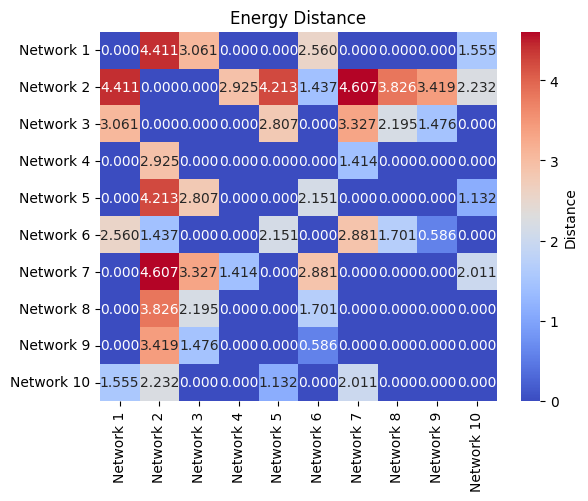

In [10]:
from inspector.utility import plot_distmat

plot_distmat(energy_distance, 'Energy Distance')

# Retry with smaller number of networks and bigger represnetation

original (4, 4, 50, 200, 300) 4
downsampled (4, 4, 5, 200, 3)
reshaped (4, 4, 5, 600)


100%|██████████| 6/6 [01:48<00:00, 18.05s/it]


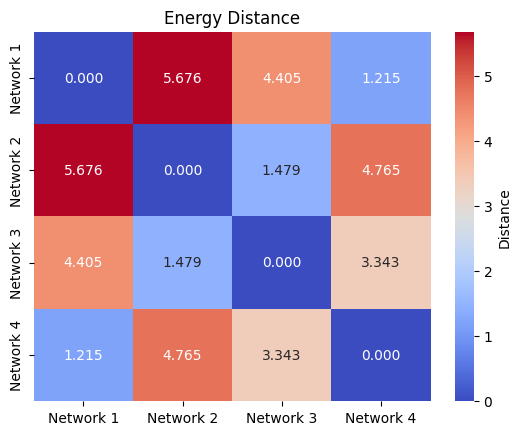

In [13]:
data_dir = os.path.abspath(r'../data/baseline')
data_files = [os.path.join(data_dir, f) for f in os.listdir(data_dir) if f.endswith('.mat')]
n_networks = 4

network_X = []
network_y = []

for f in data_files[:n_networks]:
    data = scipy.io.loadmat(f)
    test_x = data['test_x']
    test_out = data['test_out']

    network_X.append(test_x)
    network_y.append(test_out)

network_X = np.array(network_X)
network_y = np.array(network_y)
print("original", network_X.shape, len(network_y))

network_X_down = network_X[:, :, ::10,:,::100]
print("downsampled", network_X_down.shape)

network_X_reshaped = np.reshape(network_X_down, (network_X_down.shape[0], network_X_down.shape[1], network_X_down.shape[2], -1))
print("reshaped", network_X_reshaped.shape)

netrep_metric = ESM(verbose = True)
ingestion_report = netrep_metric.ingest(network_X_reshaped, None, preprcessed = True)
energy_distance = netrep_metric.score()

from inspector.utility import plot_distmat
plot_distmat(energy_distance, 'Energy Distance')

# Small number of networks but more samples

In [ ]:
data_dir = os.path.abspath(r'../data/baseline')
data_files = [os.path.join(data_dir, f) for f in os.listdir(data_dir) if f.endswith('.mat')]
n_networks = 4

network_X = []
network_y = []

for f in data_files[:n_networks]:
    data = scipy.io.loadmat(f)
    test_x = data['test_x']
    test_out = data['test_out']

    network_X.append(test_x)
    network_y.append(test_out)

network_X = np.array(network_X)
network_y = np.array(network_y)
print("original", network_X.shape, len(network_y))

network_X_down = network_X[:, :, ::10,:,::100]
print("downsampled", network_X_down.shape)

network_X_reshaped = np.reshape(network_X_down, (network_X_down.shape[0], network_X_down.shape[1], network_X_down.shape[2], -1))
print("reshaped", network_X_reshaped.shape)

netrep_metric = ESM(verbose = True)
ingestion_report = netrep_metric.ingest(network_X_reshaped, None, preprcessed = True)
energy_distance = netrep_metric.score()

from inspector.utility import plot_distmat
plot_distmat(energy_distance, 'Energy Distance')

# Retry with more networks

original (10, 4, 50, 200, 300) 10
downsampled (10, 4, 5, 200, 3)
reshaped (10, 4, 5, 600)


100%|██████████| 45/45 [11:24<00:00, 15.22s/it]


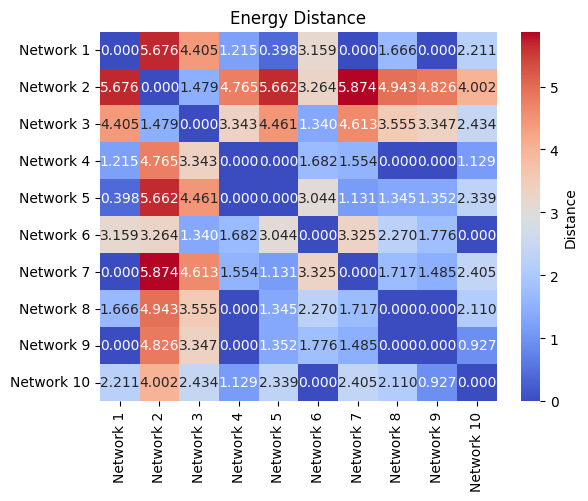

In [14]:
data_dir = os.path.abspath(r'../data/baseline')
data_files = [os.path.join(data_dir, f) for f in os.listdir(data_dir) if f.endswith('.mat')]
n_networks = 10

network_X = []
network_y = []

for f in data_files[:n_networks]:
    data = scipy.io.loadmat(f)
    test_x = data['test_x']
    test_out = data['test_out']

    network_X.append(test_x)
    network_y.append(test_out)

network_X = np.array(network_X)
network_y = np.array(network_y)
print("original", network_X.shape, len(network_y))

network_X_down = network_X[:, :, ::10,:,::100]
print("downsampled", network_X_down.shape)

network_X_reshaped = np.reshape(network_X_down, (network_X_down.shape[0], network_X_down.shape[1], network_X_down.shape[2], -1))
print("reshaped", network_X_reshaped.shape)

netrep_metric = ESM(verbose = True)
ingestion_report = netrep_metric.ingest(network_X_reshaped, None, preprcessed = True)
energy_distance = netrep_metric.score()

from inspector.utility import plot_distmat
plot_distmat(energy_distance, 'Energy Distance')

In [15]:
import seaborn as sns

def plot_distmat_fix(distmat, title = "Distance Metric", out_path = None):
    '''Plot a distance matrix
    New method uses Seaborn to create a heatmap
    '''

    # Set the x and y ticks to the labels
    number_of_networks = len(distmat[0])
    labels = [f"Network {i+1}" for i in range(number_of_networks)]

    # Plot the heatmap using Seaborn
    ax = sns.heatmap(distmat, cmap='coolwarm',
                     xticklabels=labels, yticklabels=labels, cbar_kws={'label': 'Distance'})
    ax.set_title(title)

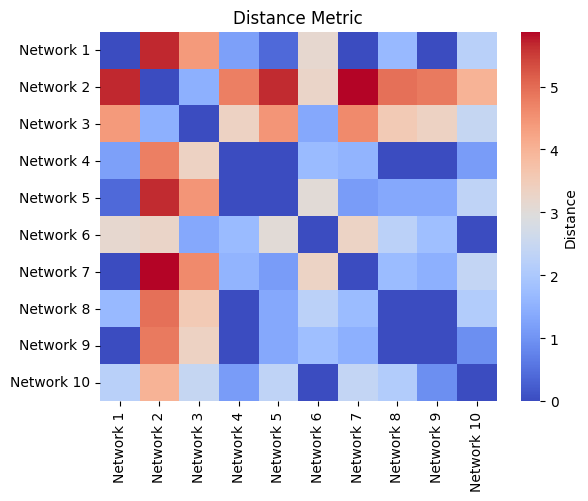

In [16]:
plot_distmat_fix(energy_distance)